# Health Expenditure & Life Expectancy Analysis

This project is an analysis of the Health Expenditure Per Capita in US$ and Life Expectancy across multiple countries.

In [2]:
# import dependencies
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objects as go
from IPython.display import Image
import os

## Cleaning and Exploring Data

In [5]:
# read in current health expenditure data set
he_df = pd.read_csv("data/current_health_expenditure.csv")
he_df.head()

IndicatorCode                                          Indicator  \
0  GHED_CHE_pc_US_SHA2011  Current health expenditure (CHE) per capita in...   
1  GHED_CHE_pc_US_SHA2011  Current health expenditure (CHE) per capita in...   
2  GHED_CHE_pc_US_SHA2011  Current health expenditure (CHE) per capita in...   
3  GHED_CHE_pc_US_SHA2011  Current health expenditure (CHE) per capita in...   
4  GHED_CHE_pc_US_SHA2011  Current health expenditure (CHE) per capita in...   

  ValueType ParentLocationCode   ParentLocation Location type  \
0   numeric                AMR         Americas       Country   
1   numeric                AFR           Africa       Country   
2   numeric               SEAR  South-East Asia       Country   
3   numeric                EUR           Europe       Country   
4   numeric                AMR         Americas       Country   

  SpatialDimValueCode   Location Period type  Period  ...  FactValueUoM  \
0                 CUB       Cuba        Year    2021  ...           NaN   
1                 GHA      Ghana        Year    2021  ...           NaN   
2                 MDV   Maldives        Year    2021  ...           NaN   
3                 BGR   Bulgaria        Year    2021  ...           NaN   
4                 ARG  Argentina        Year    2021  ...           NaN   

   FactValueNumericLowPrefix  FactValueNumericLow  FactValueNumericHighPrefix  \
0                        NaN                  NaN                         NaN   
1                        NaN                  NaN                         NaN   
2                        NaN                  NaN                         NaN   
3                        NaN                  NaN                         NaN   
4                        NaN                  NaN                         NaN   

   FactValueNumericHigh    Value  FactValueTranslationID  FactComments  \
0                   NaN      NaN                     NaN           NaN   
1                   NaN   100.00                     NaN           NaN   
2                   NaN  1038.67                     NaN           NaN   
3                   NaN  1040.02                     NaN           NaN   
4                   NaN  1044.77                     NaN           NaN   

   Language              DateModified  
0        EN  2023-12-05T08:00:00.000Z  
1        EN  2023-12-05T08:00:00.000Z  
2        EN  2023-12-05T08:00:00.000Z  
3        EN  2023-12-05T08:00:00.000Z  
4        EN  2023-12-05T08:00:00.000Z  

[5 rows x 34 columns]

In [6]:
print(he_df.isnull().sum())

IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                     4153
Dim1                          4153
Dim1ValueCode                 4153
Dim2 type                     4153
Dim2                          4153
Dim2ValueCode                 4153
Dim3 type                     4153
Dim3                          4153
Dim3ValueCode                 4153
DataSourceDimValueCode        4153
DataSource                    4153
FactValueNumericPrefix        4153
FactValueNumeric                19
FactValueUoM                  4153
FactValueNumericLowPrefix     4153
FactValueNumericLow           4153
FactValueNumericHighPrefix    4153
FactValueNumericHigh

In [7]:
he_df.drop(columns=['Indicator','IndicatorCode', 'ValueType', 'ParentLocationCode', 'SpatialDimValueCode','Period type','IsLatestYear',
                        'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 
                        'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric',
                       'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix',
                       'FactValueNumericHigh', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'], inplace=True)

In [8]:
he_df.head()

ParentLocation Location type   Location  Period    Value
0         Americas       Country       Cuba    2021      NaN
1           Africa       Country      Ghana    2021   100.00
2  South-East Asia       Country   Maldives    2021  1038.67
3           Europe       Country   Bulgaria    2021  1040.02
4         Americas       Country  Argentina    2021  1044.77

In [9]:
he_df.rename(columns={'ParentLocation': 'Continent', 'Location': 'Country', 'Period':'Year', 'Value': 'HE per Capita'}, inplace=True)

In [10]:
print(he_df.isnull().sum())

Continent         0
Location type     0
Country           0
Year              0
HE per Capita    19
dtype: int64


In [11]:
he_df.fillna({'HE per Capita':0}, inplace = True)

In [12]:
print(he_df.isnull().sum())

Continent        0
Location type    0
Country          0
Year             0
HE per Capita    0
dtype: int64


In [13]:
he_df.head()

Continent Location type    Country  Year  HE per Capita
0         Americas       Country       Cuba  2021           0.00
1           Africa       Country      Ghana  2021         100.00
2  South-East Asia       Country   Maldives  2021        1038.67
3           Europe       Country   Bulgaria  2021        1040.02
4         Americas       Country  Argentina  2021        1044.77

In [14]:
# read in life expectancy data set
le_df = pd.read_csv("data/health_life_expectancy.csv")
le_df.head()

IndicatorCode                                        Indicator ValueType  \
0  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)      text   
1  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)      text   
2  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)      text   
3  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)      text   
4  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)      text   

  ParentLocationCode ParentLocation Location type SpatialDimValueCode  \
0                AFR         Africa       Country                 LSO   
1                AFR         Africa       Country                 CAF   
2                AFR         Africa       Country                 LSO   
3                AFR         Africa       Country                 CAF   
4                AFR         Africa       Country                 SWZ   

                   Location Period type  Period  ...  FactValueUoM  \
0                   Lesotho        Year    2021  ...           NaN   
1  Central African Republic        Year    2021  ...           NaN   
2                   Lesotho        Year    2021  ...           NaN   
3  Central African Republic        Year    2021  ...           NaN   
4                  Eswatini        Year    2021  ...           NaN   

  FactValueNumericLowPrefix FactValueNumericLow FactValueNumericHighPrefix  \
0                       NaN               42.23                        NaN   
1                       NaN               42.74                        NaN   
2                       NaN               43.66                        NaN   
3                       NaN               44.26                        NaN   
4                       NaN               44.85                        NaN   

   FactValueNumericHigh               Value  FactValueTranslationID  \
0                 44.08  43.1 [42.2 – 44.1]                     NaN   
1                 44.97  43.8 [42.7 – 45.0]                     NaN   
2                 45.76  44.6 [43.7 – 45.8]                     NaN   
3                 46.48  45.4 [44.3 – 46.5]                     NaN   
4                 46.98  45.8 [44.8 – 47.0]                     NaN   

   FactComments  Language              DateModified  
0           NaN        EN  2024-08-02T07:00:00.000Z  
1           NaN        EN  2024-08-02T07:00:00.000Z  
2           NaN        EN  2024-08-02T07:00:00.000Z  
3           NaN        EN  2024-08-02T07:00:00.000Z  
4           NaN        EN  2024-08-02T07:00:00.000Z  

[5 rows x 34 columns]

In [15]:
print(le_df.isnull().sum())

IndicatorCode                     0
Indicator                         0
ValueType                         0
ParentLocationCode                0
ParentLocation                    0
Location type                     0
SpatialDimValueCode               0
Location                          0
Period type                       0
Period                            0
IsLatestYear                      0
Dim1 type                         0
Dim1                              0
Dim1ValueCode                     0
Dim2 type                     24420
Dim2                          24420
Dim2ValueCode                 24420
Dim3 type                     24420
Dim3                          24420
Dim3ValueCode                 24420
DataSourceDimValueCode        24420
DataSource                    24420
FactValueNumericPrefix        24420
FactValueNumeric                  0
FactValueUoM                  24420
FactValueNumericLowPrefix     24420
FactValueNumericLow              40
FactValueNumericHighPrefix  

In [16]:
le_df.drop(columns=['IndicatorCode','IndicatorCode', 'ValueType', 'ParentLocationCode', 'SpatialDimValueCode','Period type','IsLatestYear',
                        'Dim1 type', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 
                        'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'Value',
                       'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix',
                       'FactValueNumericHigh', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'], inplace=True)

In [17]:
le_df.head()

Indicator ParentLocation  \
0  Healthy life expectancy (HALE) at birth (years)         Africa   
1  Healthy life expectancy (HALE) at birth (years)         Africa   
2  Healthy life expectancy (HALE) at birth (years)         Africa   
3  Healthy life expectancy (HALE) at birth (years)         Africa   
4  Healthy life expectancy (HALE) at birth (years)         Africa   

  Location type                  Location  Period        Dim1  \
0       Country                   Lesotho    2021        Male   
1       Country  Central African Republic    2021        Male   
2       Country                   Lesotho    2021  Both sexes   
3       Country  Central African Republic    2021  Both sexes   
4       Country                  Eswatini    2021        Male   

   FactValueNumeric  
0             43.10  
1             43.78  
2             44.63  
3             45.43  
4             45.79

In [18]:
le_df.rename(columns={'ParentLocation': 'Continent', 'Location': 'Country', 'Period':'Year', 'Dim1': 'Gender', 'FactValueNumeric': 'Avg LE'}, inplace=True)

In [19]:
le_df.head()

Indicator Continent Location type  \
0  Healthy life expectancy (HALE) at birth (years)    Africa       Country   
1  Healthy life expectancy (HALE) at birth (years)    Africa       Country   
2  Healthy life expectancy (HALE) at birth (years)    Africa       Country   
3  Healthy life expectancy (HALE) at birth (years)    Africa       Country   
4  Healthy life expectancy (HALE) at birth (years)    Africa       Country   

                    Country  Year      Gender  Avg LE  
0                   Lesotho  2021        Male   43.10  
1  Central African Republic  2021        Male   43.78  
2                   Lesotho  2021  Both sexes   44.63  
3  Central African Republic  2021  Both sexes   45.43  
4                  Eswatini  2021        Male   45.79

In [20]:
print(le_df.isnull().sum())

Indicator        0
Continent        0
Location type    0
Country          0
Year             0
Gender           0
Avg LE           0
dtype: int64


In [21]:
le_df = le_df[le_df['Gender'] != 'Male']

In [22]:
le_df = le_df[le_df['Gender'] != 'Female']

In [23]:
le_df = le_df[le_df['Indicator'] != 'Healthy life expectancy (HALE) at age 60 (years)']

In [24]:
le_df.head()

Indicator              Continent  \
2   Healthy life expectancy (HALE) at birth (years)                 Africa   
3   Healthy life expectancy (HALE) at birth (years)                 Africa   
8   Healthy life expectancy (HALE) at birth (years)  Eastern Mediterranean   
9   Healthy life expectancy (HALE) at birth (years)                 Africa   
15  Healthy life expectancy (HALE) at birth (years)                 Africa   

   Location type                   Country  Year      Gender  Avg LE  
2        Country                   Lesotho  2021  Both sexes   44.63  
3        Country  Central African Republic  2021  Both sexes   45.43  
8        Country                   Somalia  2021  Both sexes   47.42  
9        Country                  Eswatini  2021  Both sexes   47.47  
15       Country                Mozambique  2021  Both sexes   49.72

In [25]:
le_df.drop(columns=['Gender', 'Indicator'], inplace = True)

In [26]:
le_df.head()

Continent Location type                   Country  Year  \
2                  Africa       Country                   Lesotho  2021   
3                  Africa       Country  Central African Republic  2021   
8   Eastern Mediterranean       Country                   Somalia  2021   
9                  Africa       Country                  Eswatini  2021   
15                 Africa       Country                Mozambique  2021   

    Avg LE  
2    44.63  
3    45.43  
8    47.42  
9    47.47  
15   49.72

In [27]:
combined_df = pd.merge(he_df, le_df, on=['Country','Year', ], how='left')

In [28]:
combined_df.head()

Continent_x Location type_x    Country  Year  HE per Capita  \
0         Americas         Country       Cuba  2021           0.00   
1           Africa         Country      Ghana  2021         100.00   
2  South-East Asia         Country   Maldives  2021        1038.67   
3           Europe         Country   Bulgaria  2021        1040.02   
4         Americas         Country  Argentina  2021        1044.77   

       Continent_y Location type_y  Avg LE  
0         Americas         Country   64.62  
1           Africa         Country   57.88  
2  South-East Asia         Country   66.67  
3           Europe         Country   62.39  
4         Americas         Country   64.79

In [29]:
combined_df.drop(columns=['Continent_y', 'Location type_y', 'Location type_x'], inplace = True)

In [30]:
combined_df.head()

Continent_x    Country  Year  HE per Capita  Avg LE
0         Americas       Cuba  2021           0.00   64.62
1           Africa      Ghana  2021         100.00   57.88
2  South-East Asia   Maldives  2021        1038.67   66.67
3           Europe   Bulgaria  2021        1040.02   62.39
4         Americas  Argentina  2021        1044.77   64.79

In [31]:
combined_df.rename(columns={'Continent_x': 'Continent', 'Period':'Year', 'Dim1': 'Gender', 'FactValueNumeric': 'Avg LE'}, inplace=True)

In [32]:
combined_df.head()

Continent    Country  Year  HE per Capita  Avg LE
0         Americas       Cuba  2021           0.00   64.62
1           Africa      Ghana  2021         100.00   57.88
2  South-East Asia   Maldives  2021        1038.67   66.67
3           Europe   Bulgaria  2021        1040.02   62.39
4         Americas  Argentina  2021        1044.77   64.79

In [33]:
combined_df = combined_df.query('2010 <= Year <= 2021') 

In [34]:
unique_years = combined_df['Year'].unique()

In [35]:
duplicates = combined_df[combined_df.duplicated(keep=False)]

In [36]:
print(duplicates)

Empty DataFrame
Columns: [Continent, Country, Year, HE per Capita, Avg LE]
Index: []


In [37]:
combined_df.isnull().sum()

Continent          0
Country            0
Year               0
HE per Capita      0
Avg LE           132
dtype: int64

In [38]:
combined_df.fillna({'Avg LE':0}, inplace = True)

In [39]:
combined_df.columns = combined_df.columns.str.strip()

# Data Analysis

## Health Expenditure Overtime

In [42]:
# Health expenditure overtime 
pivot_total_he = combined_df.pivot_table(index='Year', values='HE per Capita', aggfunc='sum').round().reset_index()
print("Pivoted DataFrame:\n", pivot_total_he)

Pivoted DataFrame:
     Year  HE per Capita
0   2010       188810.0
1   2011       207843.0
2   2012       202508.0
3   2013       209635.0
4   2014       214655.0
5   2015       194654.0
6   2016       198532.0
7   2017       208398.0
8   2018       220154.0
9   2019       220868.0
10  2020       231589.0
11  2021       260020.0


In [43]:
# creating path for images to print image in jupyter notebook 
if not os.path.exists("images"):
    os.makedirs("images")

fig = go.Figure()

# Add bar trace for HE
fig.add_trace(go.Bar(
    x=pivot_total_he['Year'],
    y=pivot_total_he['HE per Capita'],
    name='Total HE Overtime',
    marker_color='skyblue',
    text=pivot_total_he['HE per Capita'],  # Add data labels for HE
    textposition='auto'
))

# Layout for visualization
fig.update_layout(
    title='Total Health Expenditure per Capita Overtime',
    xaxis_title='Year',
    yaxis_title='HE per Capita',
    barmode='group',  # Group bars together
    yaxis=dict(range=[100000, 300000]),
    template='plotly_white',
    xaxis=dict(
        tickvals=pivot_total_he['Year'],  # Set tick positions to correspond to each country
        ticktext=pivot_total_he['Year'])   # Use country names as tick labels
)

# Show the plot
fig.show()
fig.write_image("images/total_he_overtime.png") 

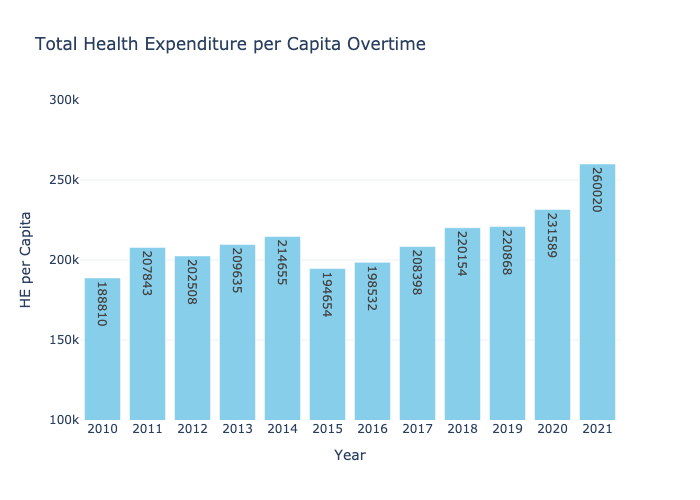

In [44]:
Image(filename="images/total_he_overtime.png")

## Top 10 countries with the highest health expenditure

In [46]:
# analyzing top HE countries
top_countries_he = combined_df.groupby('Country')['HE per Capita'].sum().nlargest(10).index

In [47]:
print(top_countries_he)

Index(['United States of America', 'Switzerland', 'Norway', 'Monaco',
       'Luxembourg', 'Denmark', 'Sweden', 'Australia',
       'Netherlands (Kingdom of the)', 'Ireland'],
      dtype='object', name='Country')


In [48]:
df_he_top = combined_df[combined_df['Country'].isin(top_countries_he)]

In [49]:
pivot_he_df = df_he_top.pivot(index='Year', columns='Country', values='HE per Capita')

/var/folders/4x/r11_vgpj4glbxvp5rrk49znc0000gn/T/ipykernel_28625/3858449869.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



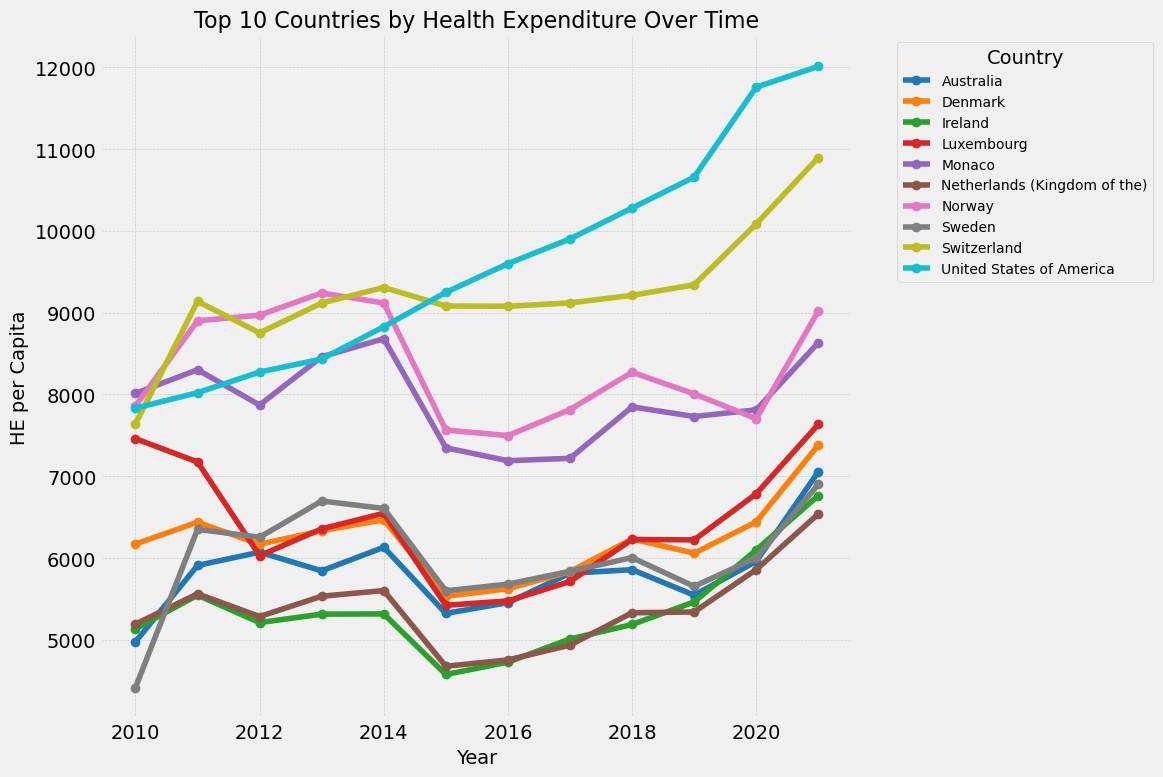

In [50]:
plt.figure(figsize=(12, 8))

# Get a colormap and set the number of colors to match the number of countries
cmap = cm.get_cmap('tab10', len(pivot_he_df.columns))  # 'tab10' is a color palette with distinct colors

# Plot each country with a unique color
for i, country in enumerate(pivot_he_df.columns):
    plt.plot(pivot_he_df.index, pivot_he_df[country], marker='o', label=country, color=cmap(i))

# Title and Axis Labels
plt.title('Top 10 Countries by Health Expenditure Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('HE per Capita', fontsize=14)

# Legend outside of the plot for clarity
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid for readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
# top continents HE overtime
pivot_continents_he = combined_df.pivot_table(index='Year', columns='Continent', values='HE per Capita', aggfunc='sum', fill_value=0)
print(pivot_continents_he)

Continent   Africa  Americas  Eastern Mediterranean     Europe  \
Year                                                             
2010       5164.52  28941.70                8485.37  122378.38   
2011       5718.60  30975.28                9319.40  133948.87   
2012       5806.49  32144.85                9507.90  126773.91   
2013       5955.21  33157.47               10002.26  132430.01   
2014       6083.78  33684.36               10648.77  135072.59   
2015       5456.62  33736.86               10542.81  117632.60   
2016       5418.04  34117.23               10401.70  119621.43   
2017       5789.67  36154.44               10432.02  125471.70   
2018       6004.96  36983.20               10982.19  134646.96   
2019       5859.15  37537.18               11114.22  134182.35   
2020       5730.16  38665.95               11234.11  142542.65   
2021       6243.55  40485.57               11735.41  163224.70   

Continent  South-East Asia  Western Pacific  
Year                         

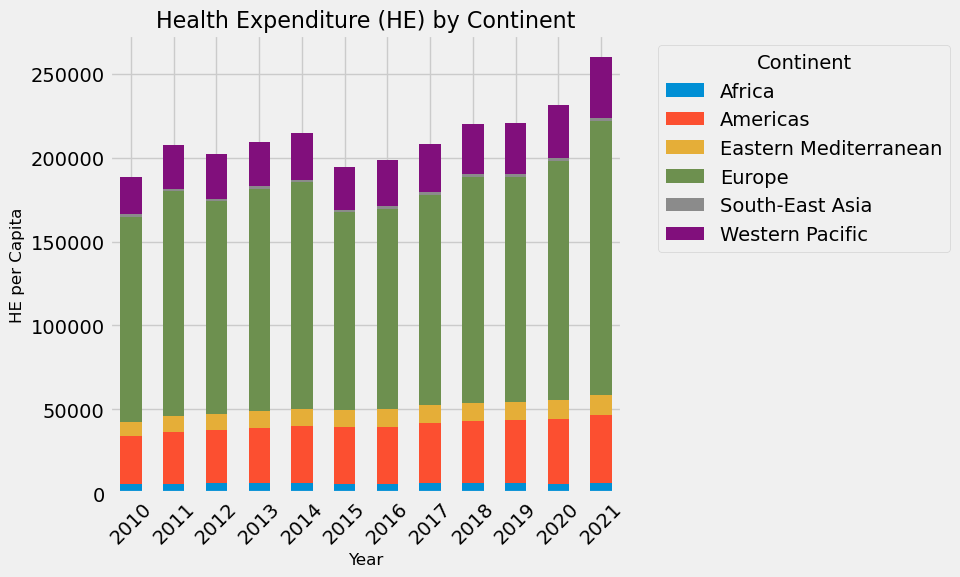

In [52]:
# Plotting the pivot table as a stacked bar chart
pivot_continents_he.plot(kind='bar', stacked=True, figsize=(10, 6))

# Title and labels
plt.title('Health Expenditure (HE) by Continent', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('HE per Capita', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Place the legend outside the graph
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')  

# Show the plot
plt.tight_layout()
plt.show()

### Life Expectancy Overtime

In [54]:
# Average life expectancy overtime 
pivot_total_le = combined_df.pivot_table(index='Year', values='Avg LE', aggfunc='mean').round().reset_index()
print("Pivoted DataFrame:\n", pivot_total_le)

Pivoted DataFrame:
     Year  Avg LE
0   2010    58.0
1   2011    58.0
2   2012    58.0
3   2013    59.0
4   2014    59.0
5   2015    59.0
6   2016    59.0
7   2017    59.0
8   2018    59.0
9   2019    60.0
10  2020    59.0
11  2021    58.0


In [55]:
# images path
if not os.path.exists("images"):
    os.makedirs("images")
    
fig = go.Figure()

# Add bar trace for LE
fig.add_trace(go.Bar(
    x=pivot_total_le['Year'],
    y=pivot_total_le['Avg LE'],
    name='Avg LE',
    marker_color='orange',
    text=pivot_total_le['Avg LE'],  # Add data labels for LE
    textposition='auto'  # Automatically position the text
))


# Layout for visualization
fig.update_layout(
    title='Avg Life Expectancy Overtime',
    xaxis_title='Year',
    yaxis_title='Avg Life Expectancy',
    barmode='group',  # Group bars together
    yaxis=dict(range=[0, 100]),
    template='plotly_white',  # Optional: change the template for styling
    xaxis=dict(
        tickvals=pivot_total_le['Year'],  # Set tick positions to correspond to each country
        ticktext=pivot_total_le['Year'])   # Use country names as tick labels
)

# Show the plot
fig.show()
fig.write_image("images/total_le_overtime.png")

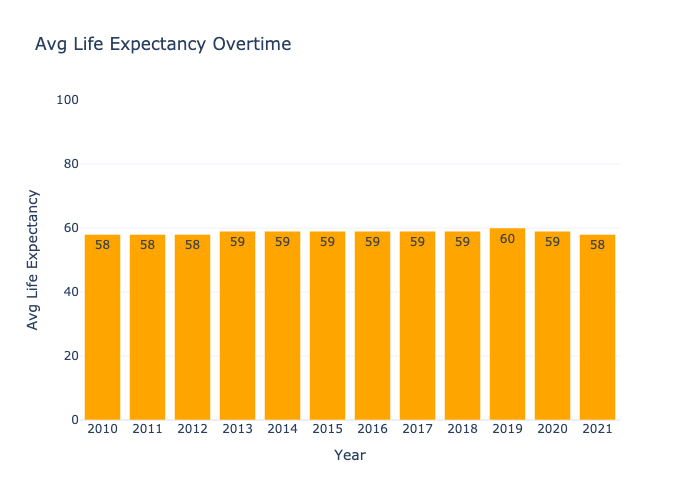

In [56]:
Image(filename="images/total_le_overtime.png")

In [57]:
top_countries_le = combined_df.groupby('Country')['Avg LE'].mean().nlargest(10).index

In [58]:
print(top_countries_le)

Index(['Japan', 'Singapore', 'Republic of Korea', 'Iceland', 'Spain', 'Israel',
       'Luxembourg', 'Switzerland', 'Italy', 'Sweden'],
      dtype='object', name='Country')


In [59]:
df_le_top = combined_df[combined_df['Country'].isin(top_countries_le)]

In [60]:
pivot_le_df = df_le_top.pivot(index='Year', columns='Country', values='Avg LE')

/var/folders/4x/r11_vgpj4glbxvp5rrk49znc0000gn/T/ipykernel_28625/304816059.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



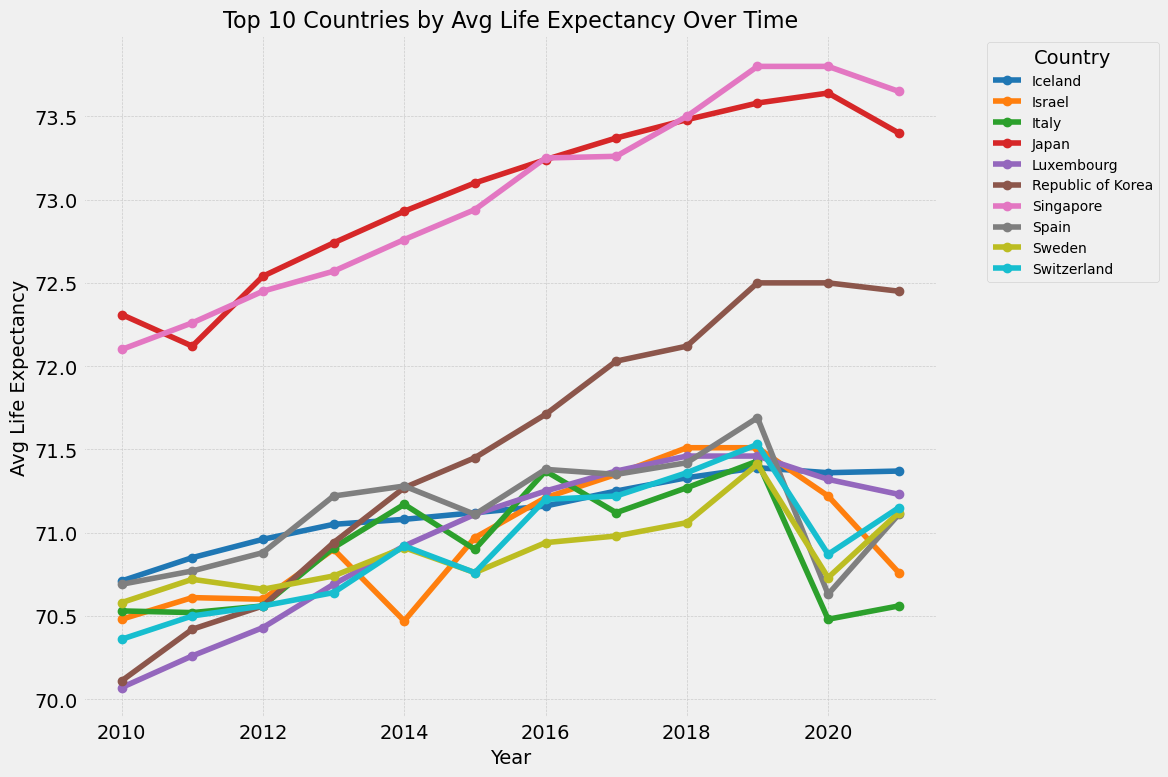

In [61]:
plt.figure(figsize=(12, 8))

# Get a colormap and set the number of colors to match the number of countries
cmap = cm.get_cmap('tab10', len(pivot_le_df.columns))  # 'tab10' is a color palette with distinct colors

# Plot each country with a unique color
for i, country in enumerate(pivot_le_df.columns):
    plt.plot(pivot_le_df.index, pivot_le_df[country], marker='o', label=country, color=cmap(i))

# Title and Axis Labels
plt.title('Top 10 Countries by Avg Life Expectancy Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg Life Expectancy', fontsize=14)

# Legend outside of the plot for clarity
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid for readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [62]:
# top continents LE overtime
pivot_continents_le = combined_df.pivot_table(index='Year', columns='Continent', values='Avg LE', aggfunc='mean', fill_value=0)
print(pivot_continents_le)

Continent     Africa   Americas  Eastern Mediterranean     Europe  \
Year                                                                
2010       52.535870  60.327714              62.402000  62.521154   
2011       53.024130  60.988000              62.454500  62.867170   
2012       53.505652  61.100857              62.384211  63.048113   
2013       53.928696  61.158286              62.942222  63.323774   
2014       54.192391  61.187714              63.043889  63.489057   
2015       54.594565  61.206857              63.143333  63.562264   
2016       55.008696  61.223429              63.608235  63.769245   
2017       55.241915  61.348286              63.812941  63.933396   
2018       55.537021  61.418286              64.047059  64.058491   
2019       55.822979  61.375143              64.172353  64.227547   
2020       55.767447  60.468571              62.921765  63.330377   
2021       55.243191  59.337429              62.162941  62.906792   

Continent  South-East Asia  Weste

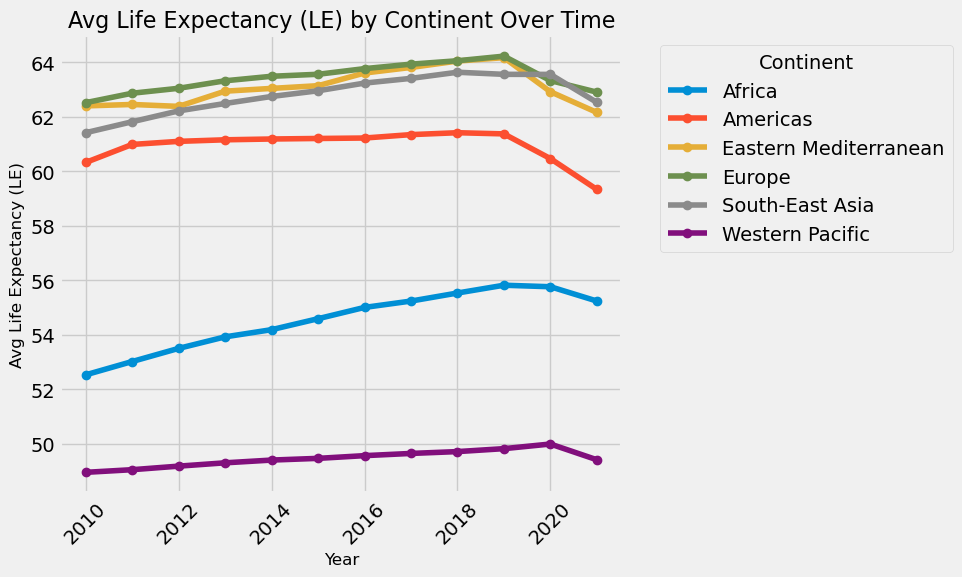

In [63]:
import matplotlib.pyplot as plt

# Plotting the pivot table as a line graph
ax = pivot_continents_le.plot(kind='line', marker='o', figsize=(10, 6))

# Title and labels
plt.title('Avg Life Expectancy (LE) by Continent Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg Life Expectancy (LE)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Place the legend outside the graph
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust as necessary

# Show the plot
plt.tight_layout()
plt.show()

# Linear Regression Analysis

In [65]:
# Independent and dependent variables
X = combined_df[['HE per Capita']]  # Independent variable (HE)
y = combined_df['Avg LE']    # Dependent variable (LE)

In [66]:
combined_df.isnull().sum()

Continent        0
Country          0
Year             0
HE per Capita    0
Avg LE           0
dtype: int64

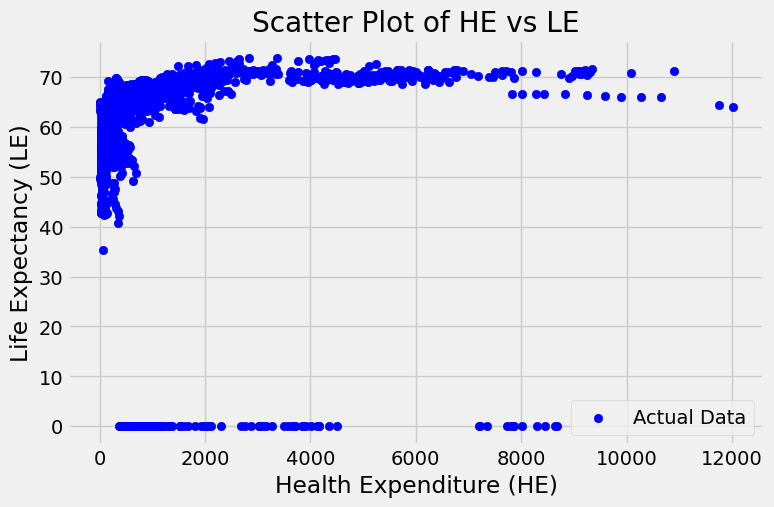

In [67]:
# scatterplot 
plt.figure(figsize=(8, 5))
plt.scatter(combined_df['HE per Capita'], combined_df['Avg LE'], color='blue', label='Actual Data')
plt.xlabel('Health Expenditure (HE)')
plt.ylabel('Life Expectancy (LE)')
plt.title('Scatter Plot of HE vs LE')
plt.legend()
plt.show()

In [68]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 57.81370219708845
Coefficient: 0.0008089415926415283


# Cluster Analysis

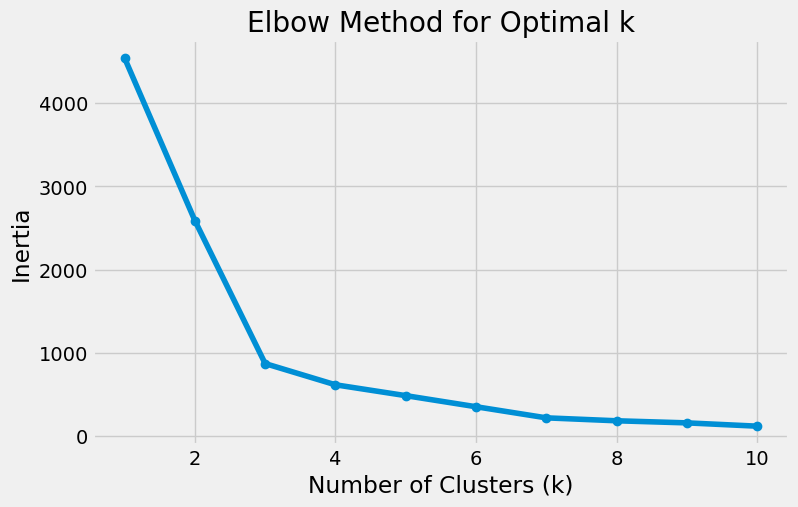

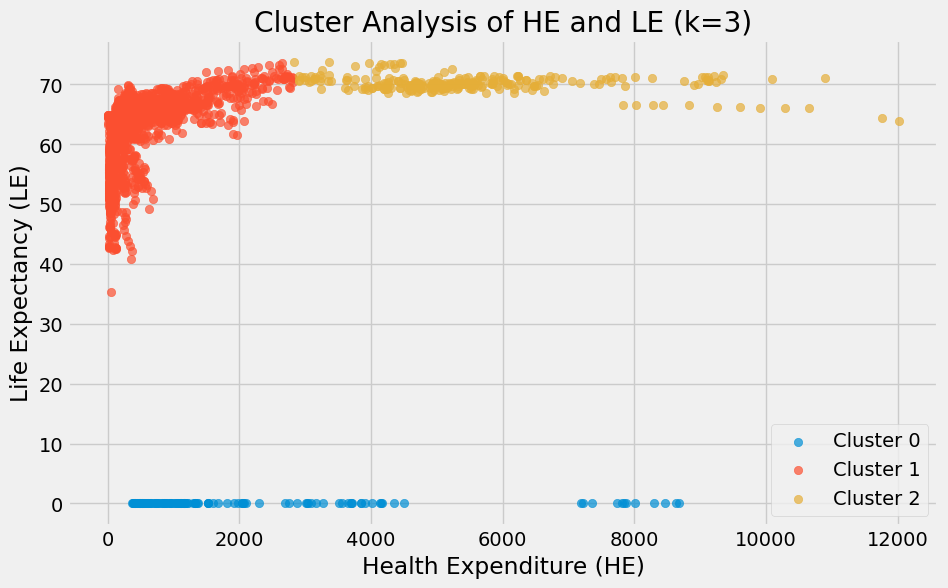

Silhouette Score: 0.7598480265570571


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df[['HE per Capita', 'Avg LE']])

# Step 2: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 3: Select a reasonable k and apply KMeans
k_optimal = 3  # Adjust based on elbow graph
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    cluster_data = combined_df[combined_df['Cluster'] == cluster]
    plt.scatter(cluster_data['HE per Capita'], cluster_data['Avg LE'], label=f'Cluster {cluster}', alpha=0.7)
    
plt.xlabel('Health Expenditure (HE)')
plt.ylabel('Life Expectancy (LE)')
plt.title(f'Cluster Analysis of HE and LE (k={k_optimal})')
plt.legend()
plt.show()

# Calculate the silhouette score for cluster quality
silhouette_avg = silhouette_score(scaled_data, combined_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

In [71]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(scaled_data)

In [72]:
print(combined_df.head())

         Continent    Country  Year  HE per Capita  Avg LE  Cluster
0         Americas       Cuba  2021           0.00   64.62        1
1           Africa      Ghana  2021         100.00   57.88        1
2  South-East Asia   Maldives  2021        1038.67   66.67        1
3           Europe   Bulgaria  2021        1040.02   62.39        1
4         Americas  Argentina  2021        1044.77   64.79        1


In [73]:
combined_df.isnull().sum()

Continent        0
Country          0
Year             0
HE per Capita    0
Avg LE           0
Cluster          0
dtype: int64

In [74]:
# Calculate the median values
cluster_profiles = combined_df.groupby('Cluster')[['HE per Capita', 'Avg LE']].median()
cluster_profiles = cluster_profiles.round(0).astype(int)

# Calculate the sample size for each cluster
sample_size = combined_df.groupby('Cluster').size()

# Add sample size as a new column to cluster_profiles
cluster_profiles['Sample Size'] = sample_size

# Display the result
print(cluster_profiles)

         HE per Capita  Avg LE  Sample Size
Cluster                                    
0                 1117       0          132
1                  246      63         1886
2                 5177      70          253


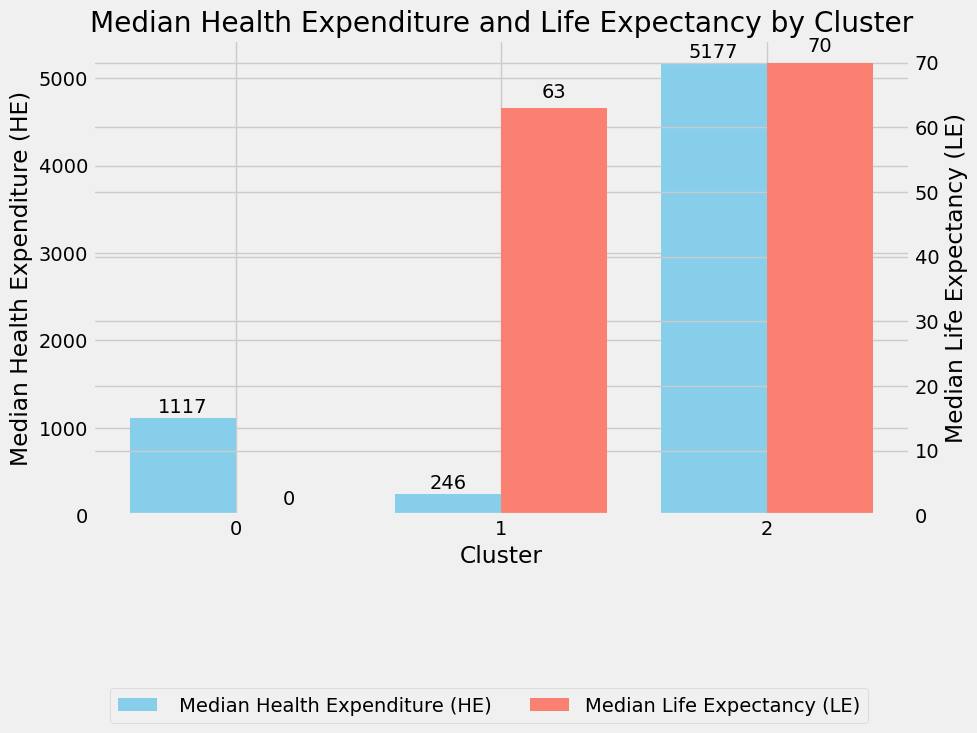

In [75]:
# Create a bar chart with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot HE per Capita on the primary y-axis
bars1 = ax1.bar(cluster_profiles.index - 0.2, cluster_profiles['HE per Capita'], width=0.4, color='skyblue', label=' Median Health Expenditure (HE)')
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Median Health Expenditure (HE)")
ax1.tick_params(axis='y')

# Set x-axis ticks to only show 0, 1, and 2
ax1.set_xticks(cluster_profiles.index)
ax1.set_xticklabels(cluster_profiles.index)

# Plot Avg LE on the secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(cluster_profiles.index + 0.2, cluster_profiles['Avg LE'], width=0.4, color='salmon', label='Median Life Expectancy (LE)')
ax2.set_ylabel("Median Life Expectancy (LE)")
ax2.tick_params(axis='y')

# Add data labels for each bar without decimals
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 10, f'{yval:.0f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.0f}', ha='center', va='bottom')

# Title and move legend right below the plot
plt.title("Median Health Expenditure and Life Expectancy by Cluster")
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

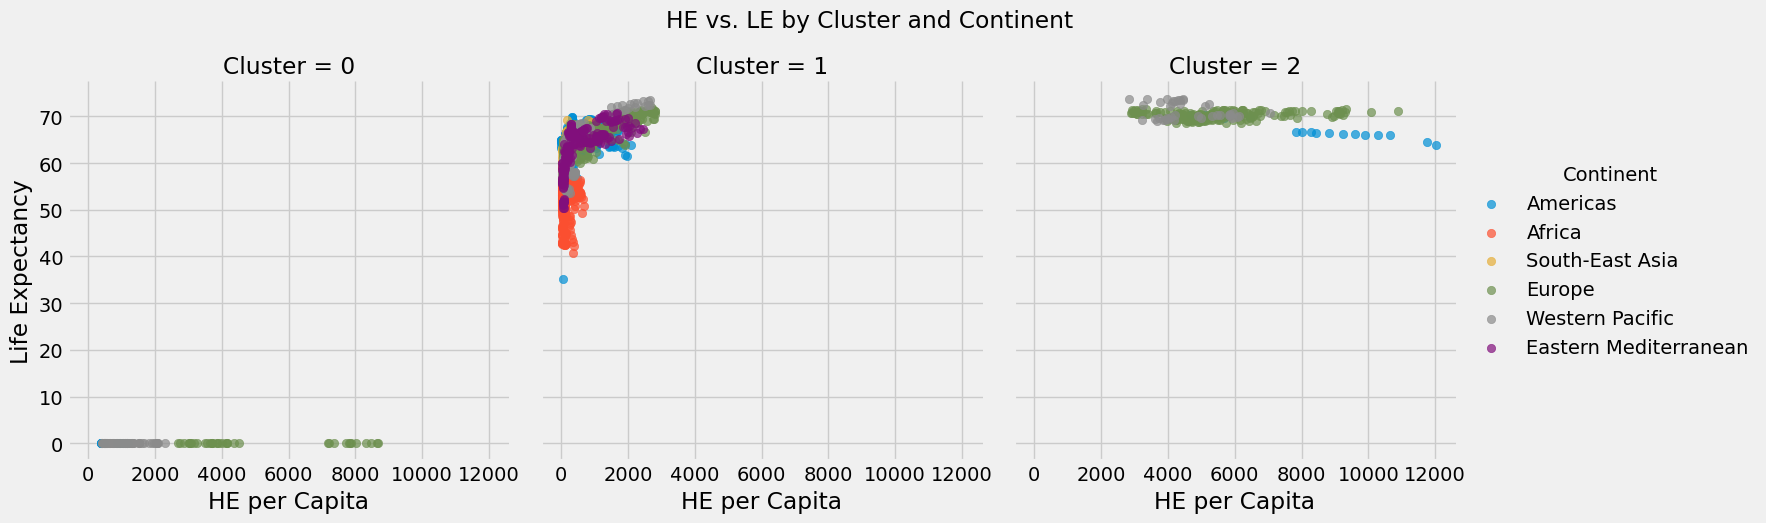

In [76]:
import seaborn as sns

# scatter plot of each cluster
g = sns.FacetGrid(combined_df, col='Cluster', hue='Continent', height=5, aspect=1)
g.map(plt.scatter, 'HE per Capita', 'Avg LE', alpha=0.7)
g.add_legend()
g.set_axis_labels('HE per Capita', 'Life Expectancy')
g.fig.suptitle('HE vs. LE by Cluster and Continent', y=1.05)
plt.show()

In [77]:
# Group by Cluster and Continent to get median values
cluster_continent_summary = combined_df.groupby(['Cluster', 'Continent']).median(numeric_only=True)
print(cluster_continent_summary)

                                 Year  HE per Capita  Avg LE
Cluster Continent                                           
0       Americas               2015.5        670.595   0.000
        Europe                 2015.5       3963.320   0.000
        Western Pacific        2015.5        839.725   0.000
1       Africa                 2016.0         57.220  54.120
        Americas               2015.5        439.130  64.670
        Eastern Mediterranean  2015.0        289.540  64.430
        Europe                 2015.0        593.845  65.885
        South-East Asia        2015.5         89.845  62.555
        Western Pacific        2015.0        176.695  61.270
2       Americas               2015.5       7151.555  68.110
        Europe                 2016.0       5191.690  70.260
        Western Pacific        2016.0       4255.610  70.295


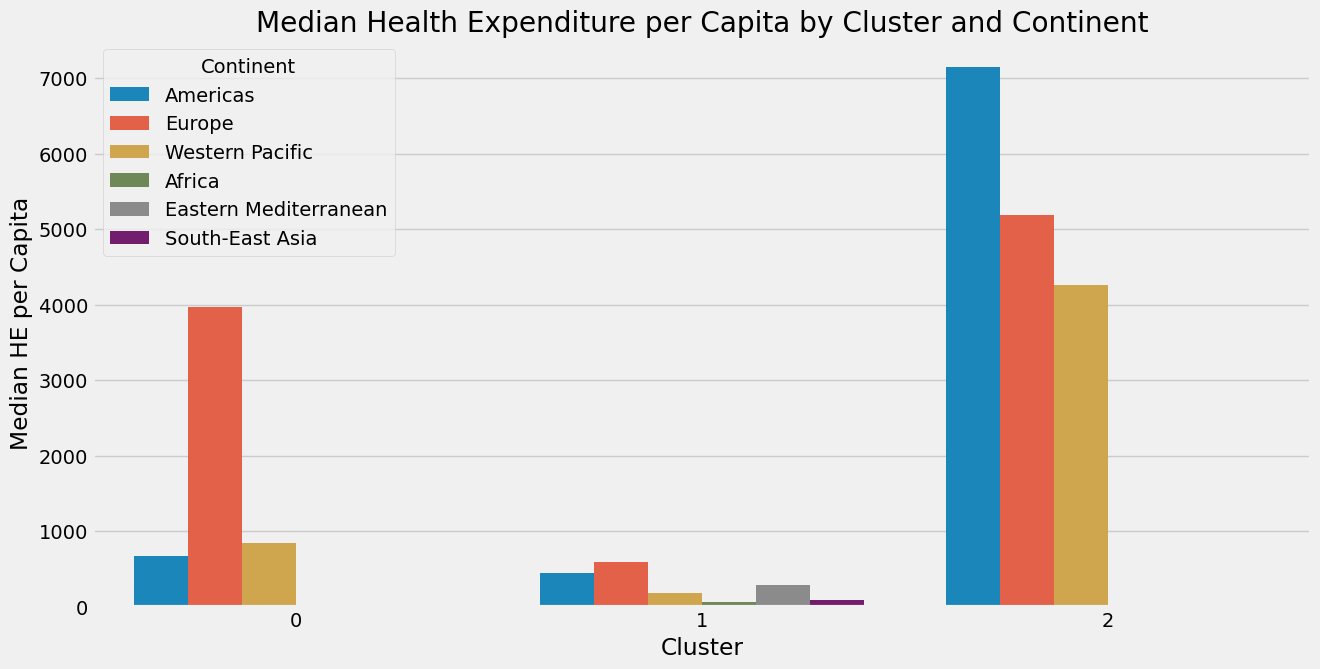

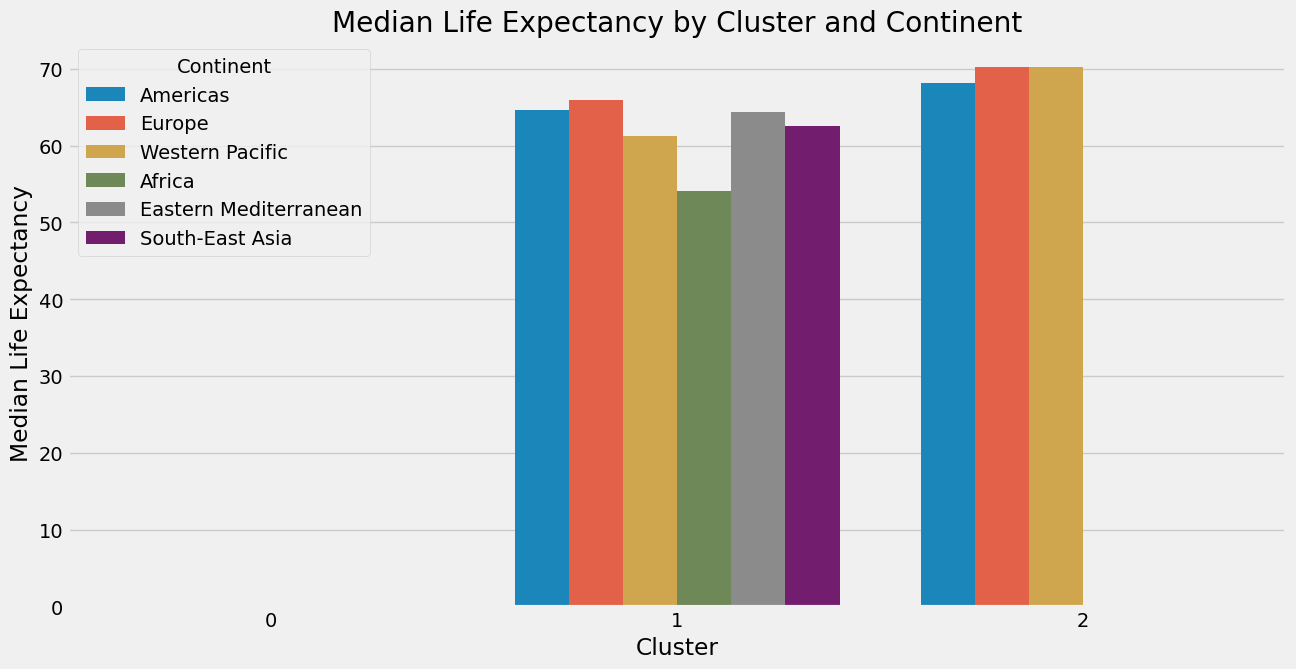

In [78]:
# Reset index for easier plotting
cluster_continent_summary = cluster_continent_summary.reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=cluster_continent_summary, x='Cluster', y='HE per Capita', hue='Continent')
plt.title('Median Health Expenditure per Capita by Cluster and Continent')
plt.xlabel('Cluster')
plt.ylabel('Median HE per Capita')
plt.legend(title='Continent')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=cluster_continent_summary, x='Cluster', y='Avg LE', hue='Continent')
plt.title('Median Life Expectancy by Cluster and Continent')
plt.xlabel('Cluster')
plt.ylabel('Median Life Expectancy')
plt.legend(title='Continent')
plt.show()